# Linear Least Square

We want to minimize the square error between the estimated value of our dependent variable y_hat = f(xi, beta) and the real value of y:

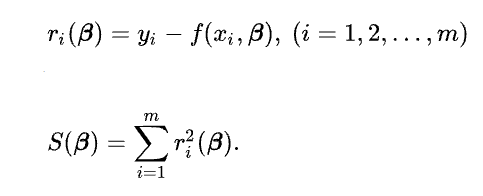

As we're trying to implement a simple linear regression problem, we can write the objective function as:

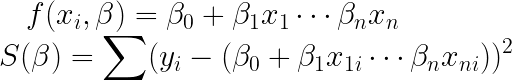

Beta being a vector with size (n x m) n being the number of independent variables and m being the number of rows of the data. We want to minimize this function by taking partial derivatives with respect to each coefficient Beta:

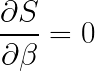

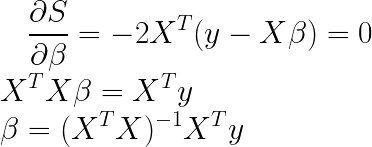

Now that we know how to calculate beta, we can predict y_hat with it



In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [18]:
def beta(X, y):
  # this function should return the vector Beta with length equals to the number of independent variables

  X = X.to_numpy()
  y = y.to_numpy()

  X_dot_multip_inv = np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)) # (X^T X)^-1 X^T
  beta = np.dot(X_dot_multip_inv, y)
  return beta

def linear_least_square(X_train, y_train, X_test):
  Beta = beta(X_train, y_train)
  y_hat = np.dot(X_test, Beta)
  return y_hat

def normalization(X_train, X_test):

  X_mean = X_train.mean()
  X_std = X_train.std()

  columns = list(X_train.columns)

  for i in columns:
    X_test[i]  = (X_test[i] - X_mean[i])/X_std[i]
    X_train[i] = (X_train[i] - X_mean[i])/X_std[i]

  return X_train, X_test

def scaling(X_train, X_test):

  X_max = np.max(X_train)
  X_min = np.min(X_train)

  columns = list(X_train.columns)
  for i in columns:
    X_test[i]  = (X_test[i] - X_min[i])/(X_max[i] - X_min[i])
    X_train[i]  = (X_train[i] - X_min[i])/(X_max[i] - X_min[i])

  return X_train, X_test

def RMSE(y, y_hat):

  y_size = len(y)
  dif = np.power(y - y_hat, 2)
  return np.sqrt(np.sum(dif)/y_size)

In [19]:
# Preparing the Data
df = pd.read_csv('/content/mtcars.csv', sep=';', decimal=',')
df = df.set_index('Unnamed: 0')


X = df.drop(['mpg', 'mpg_bin'], axis = 1)
y = df[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Normalisation / Scaling
X_train_norm, X_test_norm = normalization(X_train, X_test)
X_train_scaling, X_test_scaling = scaling(X_train, X_test)


# Linear Regression
y_hat_norm = linear_least_square(X_train_norm, y_train, X_test_norm)
y_hat_scaling = linear_least_square(X_train_scaling, y_train, X_test_scaling)

# RMSE
rmse_norm = RMSE(y_test, y_hat_norm)
print("RMSE with normalization", rmse_norm)

rmse_scaling = RMSE(y_test, y_hat_scaling)
print("RMSE with normalization", rmse_scaling)

RMSE with normalization mpg    7.299238
dtype: float64
RMSE with normalization mpg    7.299238
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
